# Star Wars Survey
While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

For this project, I'll be cleaning and exploring this particular data set.

## Part I: Data Cleaning

In [145]:
import pandas as pd
import numpy as np

star_wars = pd.read_csv("/Users/chesterjohn/Desktop/dataquest/jupyter-2-data-cleaning/StarWars.csv", encoding="ISO-8859-1")
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

First, we get rid of rows without a unique respondent ID below.

In [142]:
got_id = pd.notnull(star_wars["RespondentID"])
star_wars = star_wars[got_id]
print(star_wars)

      RespondentID  \
1     3.292880e+09   
2     3.292880e+09   
3     3.292765e+09   
4     3.292763e+09   
5     3.292731e+09   
6     3.292719e+09   
7     3.292685e+09   
8     3.292664e+09   
9     3.292654e+09   
10    3.292640e+09   
11    3.292638e+09   
12    3.292635e+09   
13    3.292609e+09   
14    3.292597e+09   
15    3.292587e+09   
16    3.292583e+09   
17    3.292581e+09   
18    3.292573e+09   
19    3.292565e+09   
20    3.292562e+09   
21    3.292522e+09   
22    3.292521e+09   
23    3.292512e+09   
24    3.292483e+09   
25    3.292465e+09   
26    3.292448e+09   
27    3.292420e+09   
28    3.292384e+09   
29    3.292380e+09   
30    3.292377e+09   
...            ...   
1157  3.288426e+09   
1158  3.288423e+09   
1159  3.288423e+09   
1160  3.288422e+09   
1161  3.288421e+09   
1162  3.288418e+09   
1163  3.288418e+09   
1164  3.288417e+09   
1165  3.288415e+09   
1166  3.288414e+09   
1167  3.288413e+09   
1168  3.288410e+09   
1169  3.288410e+09   
1170  3.28

Now we want to convert any Yes/No columns to boolean to allow us to analyse the data easier down the road.

In [143]:
seen = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]

print(seen.value_counts())

yes_no = {"Yes":True,"No":False}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = seen.map(yes_no)
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"])

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
1        True
2       False
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12      False
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26      False
27       True
28       True
29       True
30       True
        ...  
1157     True
1158    False
1159     True
1160    False
1161     True
1162     True
1163     True
1164     True
1165     True
1166     True
1167     True
1168     True
1169    False
1170     True
1171    False
1172     True
1173     True
1174     True
1175     True
1176     True
1177     True
1178     True
1179    False
1180     True
1181     True
1182     True
1183     True
1184    False
1185     True
1186     True
Name: Have you seen any of the 6 films in t

In [64]:
is_fan = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]

print(is_fan.value_counts())

yes_no = {"Yes":True,"No":False}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = is_fan.map(yes_no)
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"])

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
1        True
2         NaN
3       False
4        True
5        True
6        True
7        True
8        True
9        True
10      False
11        NaN
12        NaN
13      False
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22      False
23       True
24       True
25       True
26        NaN
27       True
28       True
29       True
30       True
        ...  
1157    False
1158      NaN
1159    False
1160      NaN
1161    False
1162    False
1163     True
1164    False
1165    False
1166     True
1167     True
1168    False
1169      NaN
1170     True
1171      NaN
1172     True
1173     True
1174     True
1175    False
1176     True
1177    False
1178    False
1179      NaN
1180     True
1181     True
1182     True
1183     True
1184      NaN
1185     True
1186    False
Name: Have you seen any of the 6 f

Below, columns 3 to 9 represent a single checkbox question, asking participants if they've watched the particular Star Wars movie. The value for these columns are the name of the movies themselves making it hard to read at a glance. The columns themselves are not named, except for the first of the group, which asks "Which of the following Star Wars films have you seen? Please select all that apply". You can print the uncleaned data for yourself to see what I mean.

In [62]:
yes_no = {"Star Wars: Episode I  The Phantom Menace":True,
          "Star Wars: Episode II  Attack of the Clones":True,
          "Star Wars: Episode III  Revenge of the Sith":True,
          "Star Wars: Episode IV  A New Hope":True,
          "Star Wars: Episode V The Empire Strikes Back":True,
          "Star Wars: Episode VI Return of the Jedi":True, 
          np.nan:False}

for i in star_wars[star_wars.columns[3:9]]:
    star_wars[i] = star_wars[i].map(yes_no)

print(star_wars[star_wars.columns[3:9]])

      seen_ep1  seen_ep2  seen_ep3  seen_ep4  seen_ep5  seen_ep6
1         True      True      True      True      True      True
2        False     False     False     False     False     False
3         True      True      True     False     False     False
4         True      True      True      True      True      True
5         True      True      True      True      True      True
6         True      True      True      True      True      True
7         True      True      True      True      True      True
8         True      True      True      True      True      True
9         True      True      True      True      True      True
10       False      True     False     False     False     False
11       False     False     False     False     False     False
12       False     False     False     False     False     False
13        True      True      True      True      True      True
14        True      True      True      True      True      True
15        True      True 

In [63]:
cols = star_wars[star_wars.columns[3:9]].columns

star_wars = star_wars.rename(columns={
    cols[0]: "seen_ep1",
    cols[1]: "seen_ep2",
    cols[2]: "seen_ep3",
    cols[3]: "seen_ep4",
    cols[4]: "seen_ep5",
    cols[5]: "seen_ep6",
})

print(star_wars[star_wars.columns[3:9]])

      seen_ep1  seen_ep2  seen_ep3  seen_ep4  seen_ep5  seen_ep6
1         True      True      True      True      True      True
2        False     False     False     False     False     False
3         True      True      True     False     False     False
4         True      True      True      True      True      True
5         True      True      True      True      True      True
6         True      True      True      True      True      True
7         True      True      True      True      True      True
8         True      True      True      True      True      True
9         True      True      True      True      True      True
10       False      True     False     False     False     False
11       False     False     False     False     False     False
12       False     False     False     False     False     False
13        True      True      True      True      True      True
14        True      True      True      True      True      True
15        True      True 

Columns 9 to 15 are similar to our solution above. These columns represent the ranking of each movie from 1 to 6, 1 meaning to best. We first need to change the ranking values for each column to a float type, then again rename the columns.

In [81]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [67]:
cols = star_wars[star_wars.columns[9:15]].columns

star_wars = star_wars.rename(columns={
    cols[0]: "rank_ep1",
    cols[1]: "rank_ep2",
    cols[2]: "rank_ep3",
    cols[3]: "rank_ep4",
    cols[4]: "rank_ep5",
    cols[5]: "rank_ep6",
})

print(star_wars[star_wars.columns[9:15]])

      rank_ep1  rank_ep2  rank_ep3  rank_ep4  rank_ep5  rank_ep6
1          3.0       2.0       1.0       4.0       5.0       6.0
2          NaN       NaN       NaN       NaN       NaN       NaN
3          1.0       2.0       3.0       4.0       5.0       6.0
4          5.0       6.0       1.0       2.0       4.0       3.0
5          5.0       4.0       6.0       2.0       1.0       3.0
6          1.0       4.0       3.0       6.0       5.0       2.0
7          6.0       5.0       4.0       3.0       1.0       2.0
8          4.0       5.0       6.0       3.0       2.0       1.0
9          5.0       4.0       6.0       2.0       1.0       3.0
10         1.0       2.0       3.0       4.0       5.0       6.0
11         NaN       NaN       NaN       NaN       NaN       NaN
12         NaN       NaN       NaN       NaN       NaN       NaN
13         3.0       4.0       5.0       6.0       1.0       2.0
14         4.0       5.0       6.0       2.0       3.0       1.0
15         4.0       2.0 

## Part II: Data Analysis

### Which Is The Most Liked Episode?

rank_ep1    3.732934
rank_ep2    4.087321
rank_ep3    4.341317
rank_ep4    3.272727
rank_ep5    2.513158
rank_ep6    3.047847
dtype: float64


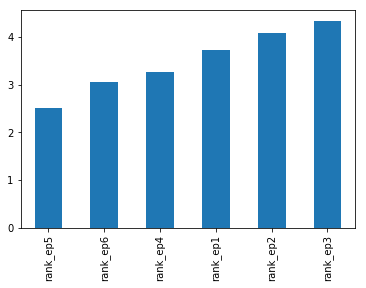

In [133]:
import matplotlib.pyplot as plt
ranking_means = star_wars[star_wars.columns[9:15]].mean()
print(ranking_means)
ranking_means.sort_values().plot.bar()
plt.show()

Well whaddaya know, episode V is the officially the highest rated of the Star Wars movies - and rightfully so! It seems that all of the OG movies are rather higher than the prequels.

### Which Is The Most Viewed Episode?

seen_ep1    673
seen_ep2    571
seen_ep3    550
seen_ep4    607
seen_ep5    758
seen_ep6    738
dtype: int64


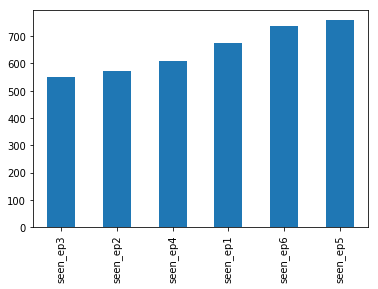

In [132]:
total_seen = star_wars[star_wars.columns[3:9]].sum()
print(total_seen)
total_seen.sort_values().plot.bar()
plt.show()

Most seen episode again goes to Empire, followed by Jedi then Phantom Manace, which is not surprising seeing that Manace was the first movie after so many years - also helps that it wasn't half bad.

### Do Males and Females Feel Differently About Each Episode?

In [82]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

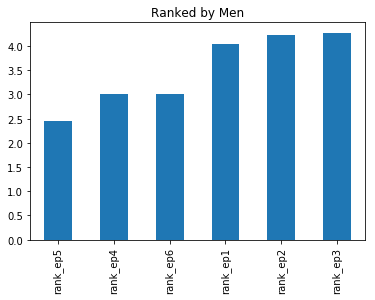

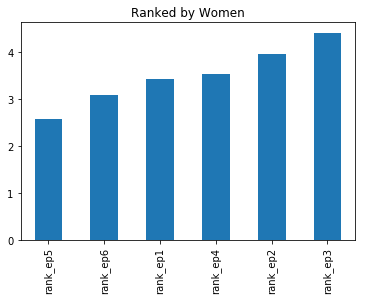

In [130]:
males[star_wars.columns[9:15]].mean().sort_values().plot.bar(title="Ranked by Men")
plt.show()

females[star_wars.columns[9:15]].mean().sort_values().plot.bar(title="Ranked by Women")
plt.show()

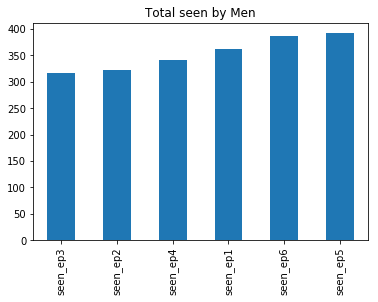

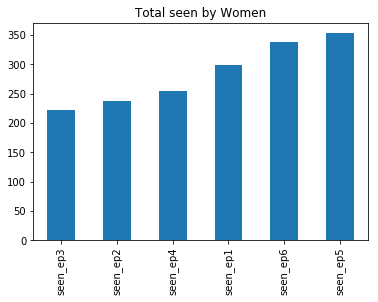

In [129]:
males[star_wars.columns[3:9]].sum().sort_values().plot.bar(title="Total seen by Men")
plt.show()

females[star_wars.columns[3:9]].sum().sort_values().plot.bar(title="Total seen by Women")
plt.show()

In total, Men watch more Star Wars than women. Both genders agree that Empire is the best, but Men seems to rank New Hope and Jedi similarly. While both genders are critical of the prequels, Men are more so.

### Who is The Most Liked and Most Disliked Character? (The Answer will Shock You!)

Han Solo             610
Luke Skywalker       552
Princess Leia        547
Anakin Skywalker     245
Obi Wan Kenobi       591
Emperor Palpatine    110
Darth Vader          310
Lando Calrissian     142
Boba Fett            138
C-3P0                474
R2D2                 562
Jar Jar Binks        112
Padme Amidala        168
Yoda                 605
dtype: int64


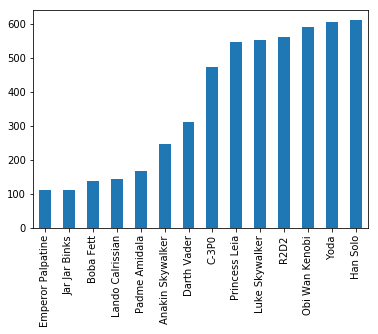

In [128]:
cols = star_wars[star_wars.columns[15:29]].columns

star_wars = star_wars.rename(columns={
    cols[0]:"Han Solo",
    cols[1]:"Luke Skywalker",
    cols[2]:"Princess Leia",
    cols[3]:"Anakin Skywalker",
    cols[4]:"Obi Wan Kenobi",
    cols[5]:"Emperor Palpatine",
    cols[6]:"Darth Vader",
    cols[7]:"Lando Calrissian",
    cols[8]:"Boba Fett",
    cols[9]:"C-3P0",
    cols[10]:"R2D2",
    cols[11]:"Jar Jar Binks",
    cols[12]:"Padme Amidala",
    cols[13]:"Yoda"
})

def fav_char(data):
    results = data.values.tolist().count("Very favorably")
    return results


popularity = star_wars[star_wars.columns[15:29]].apply(fav_char)
print(popularity)
popularity.sort_values().plot.bar()
plt.show()
    

In terms of popularity, Han Solo edged out on Yoda by only 5 votes as the most liked character. As a fan of Obi Wan Kenobi, i'm happy to report that he closed in on third followed by, nope not Luke, but believe it or not - R2D2! However, if this survey were to include BB8, i'd be willing to bet my money on the cute little round droid. However, most surprising the the most hated character - It's not Jar Jar Binks! What a shocker! It's actually dear old Palpatine.